# Модели VGG

## Импорт библиотек

In [1]:
import torch
import torch.nn as nn

## Реализация модели VGG 11

In [16]:
class VGG11(nn.Module):
    def __init__(self, num_classes=1000, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, (3, 3), padding=1), 
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(256, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7,7))

        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

In [17]:
vgg_11_model = VGG11()

inp_tensor = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = vgg_11_model(inp_tensor)
print(pred.shape)

torch.Size([1, 1000])


## Реализация общего класса модели VGG

In [ ]:
cfgs = {
    "vgg_11":[64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "vgg_13":[64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "vgg_16":[64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "vgg_19":[64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

In [18]:
class VGG(nn.Module):

    _cfgs = {
        "vgg_11":[64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
        "vgg_13":[64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
        "vgg_16":[64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
        "vgg_19":[64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
    }
    
    def __init__(self, name, num_classes=1000, dropout=0.5):
        super().__init__()
        self.cfg = self._cfgs[name]

        self.features = self.make_layers(self.cfg)
        self.avgpool = nn.AdaptiveAvgPool2d((7,7))

        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x


    def make_layers(self, cfg):
        layers = []
        in_channels = 3
        for value in cfg:
            if value == "M":
                layers += [nn.MaxPool2d(2)]
            else:
                conv2d = nn.Conv2d(in_channels, value, (3, 3), padding=1)
                layers += [conv2d, nn.ReLU(True)]
                in_channels = value
        return nn.Sequential(*layers)

In [19]:
model_VGG_19 = VGG('vgg_19')
model_VGG_19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [20]:
# проверка работы модели 

inp_tensor = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = model_VGG_19(inp_tensor)
print(pred.shape)

torch.Size([1, 1000])


## Готовая архитектура VGG в torchvision

### Импорт библиотек для этого раздела

In [22]:
import torchvision
from torchvision import models
import torchvision.transforms as v1
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('dark_background')

### Загрузка моделей

In [23]:
# просто загрузить модель

vgg_11 = models.vgg11()

In [24]:
# загрузить модель с обученными весами (сейчас немного устарело)

vgg_13 = models.vgg13(pretrained=True)

C:\Users\metel\.conda\envs\nn_edu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\metel\.conda\envs\nn_edu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg13-19584684.pth" to C:\Users\metel/.cache\torch\hub\checkpoints\vgg13-19584684.pth


100%|███████████████████████████████████████████████████████████████████████████████| 508M/508M [00:41<00:00, 12.7MB/s]


In [27]:
# загрузить модель с конкретными весами

vgg_16 = models.vgg16(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\metel/.cache\torch\hub\checkpoints\vgg16-397923af.pth


100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [00:43<00:00, 12.7MB/s]


In [28]:
# загрузить модель с конкретными весами (аналогично команде выше)

vgg_19 = models.vgg19(weights="IMAGENET1K_V1")

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\metel/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


100%|███████████████████████████████████████████████████████████████████████████████| 548M/548M [00:45<00:00, 12.7MB/s]


In [29]:
# проверка работы модели 

inp_tensor = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = vgg_19(inp_tensor)
print(pred.shape)

torch.Size([1, 1000])


### Обученные веса всех моделей

In [30]:
# два способа извлечь веса

weights_vgg11 = models.VGG11_Weights.IMAGENET1K_V1
weights_vgg13 = models.VGG13_Weights.DEFAULT

In [31]:
# модель с весами

vgg_13_model = models.vgg13(weights = weights_vgg13)

In [32]:
# Ссылка для скачивания обученных весов

vgg_13_weights_url = weights_vgg13.url
vgg_13_weights_url

'https://download.pytorch.org/models/vgg13-19584684.pth'

In [35]:
# дефолтные преобразования

vgg13_transforms = weights_vgg13.transforms()
vgg13_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [36]:
# Список с именами классов

class_names = weights_vgg13.meta['categories']
print(type(class_names))
print(len(class_names))
print(class_names[:7])

<class 'list'>
1000
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray']


### Предсказания обученной модели

In [39]:
img = Image.open('cow_image.jpg')

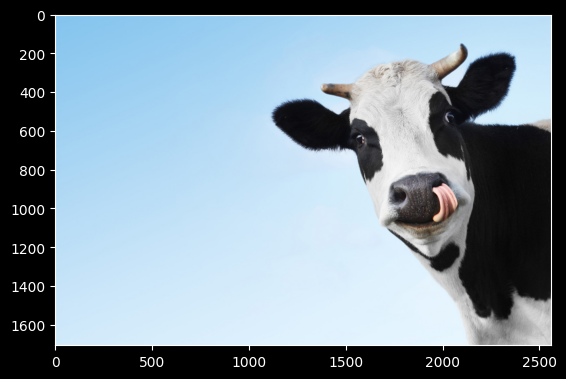

In [40]:
plt.imshow(img)

In [43]:
# дефолтные преобразования

transform_default = weights_vgg13.transforms()

In [44]:
# Преобразования изображений на основе модуля V1

size = 224  # Целевой размер изображения после кадрирования (224x224 пикселя)

transform_v1 = v1.Compose([
    v1.Resize(256),          # 1. Изменяет размер изображения cохраняя пропорции так, чтобы меньшая сторона (ширина или высота) стала равна 256 пикселям
    v1.CenterCrop(size),     # 2. Вырезает центральную область размером 224x224 пикселя
    v1.ToTensor(),           # 3. Конвертирует PIL-изображение в тензор PyTorch (формат [C, H, W], значения 0-1)
    v1.Normalize(            # 4. Нормализует тензор (нормализация ImageNet (на котором предобучены популярные модели)):
        mean=(0.485, 0.456, 0.406),  # Вычитает эти средние значения для каждого канала (RGB)
        std=(0.229, 0.224, 0.225)    # Делит на эти стандартные отклонения для каждого канала
    )
])

In [49]:
# Преобразования изображений на основе модуля V2

size = 224  # Целевой размер изображения после кадрирования (224x224 пикселя)

transform_v2 = v2.Compose([
    v2.ToImage(),            # 1. Конвертируем в тензор [C,H,W] (0-255)
    v2.Resize(256),          # 2. Изменяет размер изображения cохраняя пропорции так, чтобы меньшая сторона (ширина или высота) стала равна 256 пикселям
    v2.CenterCrop(size),     # 3. Вырезает центральную область размером 224x224 пикселя
    v2.ToDtype(              # 4. Конвертируем в float и делим на 255
        dtype=torch.float32, 
        scale=True
    ),
    v2.Normalize(            # 5. Нормализует тензор (нормализация ImageNet (на котором предобучены популярные модели)):
        mean=(0.485, 0.456, 0.406),  # Вычитает эти средние значения для каждого канала (RGB)
        std=(0.229, 0.224, 0.225)    # Делит на эти стандартные отклонения для каждого канала
    )
])

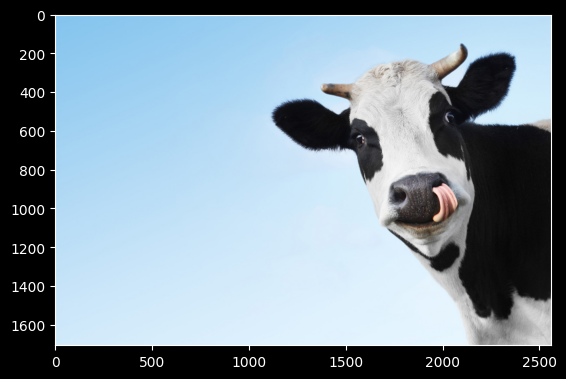

transform_default:
    ram => 0.44341
    ox => 0.21409
    bighorn => 0.19849
    llama => 0.02388
    Boston bull => 0.01692
    water buffalo => 0.01569
transform_v1:
    ram => 0.44341
    ox => 0.21409
    bighorn => 0.19849
    llama => 0.02388
    Boston bull => 0.01692
    water buffalo => 0.01569
transform_v2:
    ram => 0.42982
    ox => 0.22039
    bighorn => 0.19869
    llama => 0.02412
    Boston bull => 0.01904
    water buffalo => 0.01503


In [51]:
transforms = {
    'transform_default': transform_default,
    'transform_v1' : transform_v1,
    'transform_v2' : transform_v2
}

plt.imshow(img)
plt.show()

vgg_13_model.eval()
for name, transform in transforms.items():
    print(f'{name}:')
    img_in = transform(img).unsqueeze(dim=0) # img => transform => (3, 224, 224) => unsqueeze => (1, 3, 224, 224)
    pred = vgg_13_model(img_in).squeeze()    # (1, 1000) => (1000)

    sorted, indices = pred.softmax(dim=0).sort(descending=True)
    for i, (s, ind) in enumerate(zip(sorted, indices)):
        print(f'    {class_names[ind]} => {s:.5f}')
        if i//5:
            break
    print('========================')